In [1]:
# Pandas
import pandas as pd

# SQL Alchemy
from sqlalchemy import create_engine

# got the error multiple times related to psycopg2 not present, so imported it
import psycopg2

# importing matplotlib and the private query with the credentials 

import matplotlib.pyplot as plt
import numpy as np
from keys import sql_query

engine = create_engine(sql_query)
connect = engine.connect()

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
# Department-employee Dataframe

dept_employee_data = pd.read_sql("SELECT * FROM Dept_emp", connect)
dept_employee_data.head(10)

dept_employee_clean = dept_employee_data.rename(columns={"emp_no": "Employee Number", "dept_no": "Department Number"})
dept_employee_clean.head(10)

,Employee Number,Department Number
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003
5,10006,d005
6,10007,d008
7,10008,d005
8,10009,d006
9,10010,d004


In [4]:
# Salary Dataframe

salary_data = pd.read_sql("SELECT * FROM Salaries", connect)

salaries_clean = salary_data.rename(columns={"emp_no": "Employee Number", "salary": "Salary"})
salaries_clean.head(10)

,Employee Number,Salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
5,10006,40000
6,10007,56724
7,10008,46671
8,10009,60929
9,10010,72488


In [5]:
# Employees Dataframe

employees_data = pd.read_sql("SELECT * FROM Employees", connect)

employees_clean = employees_data.rename(columns={"emp_no": "Employee Number", "title_id": "Title ID", "birth_date": "Birth Date", "first_name" : "First Name", "last_name" : "Last Name", "sex" : "Sex", "hire_date" : "Hire Date"})
employees_clean.head(10)

,Employee Number,Title ID,Birth Date,First Name,Last Name,Sex,Hire Date
0,473302,s0001,2053-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,2054-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,2058-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,2057-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,2052-10-28,Abdelkader,Baumann,F,1991-01-18
5,263976,e0003,2059-10-30,Eran,Cusworth,M,1986-11-14
6,273487,s0001,2057-04-14,Christoph,Parfitt,M,1991-06-28
7,461591,s0002,2064-11-17,Xudong,Samarati,M,1985-11-13
8,477657,e0002,2062-12-18,Lihong,Magliocco,M,1993-10-23
9,219881,s0002,2056-04-24,Kwangyoen,Speek,F,1993-02-14


In [6]:
# Departments Dataframe

departments = pd.read_sql("SELECT * FROM Departments", connect)
departments.head(10)

departments_clean = departments.rename(columns={"dept_name": "Department Name", "dept_no": "Department Number"})
departments_clean.head(10)

,Department Number,Department Name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [7]:
# Titles Dataframe

titles = pd.read_sql("SELECT * FROM Titles", connect)
# titles.head(10)

titles_clean = titles.rename(columns={"title_id": "Title ID", "title": "Title"})
titles_clean

,Title ID,Title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [8]:
#Employee and Salary DF merge

employees_salaries = pd.merge(employees_clean, salaries_clean, on="Employee Number", how="inner")
employees_salaries.head(10)

,Employee Number,Title ID,Birth Date,First Name,Last Name,Sex,Hire Date,Salary
0,473302,s0001,2053-07-25,Hideyuki,Zallocco,M,1990-04-28,40000
1,475053,e0002,2054-11-18,Byong,Delgrande,F,1991-09-07,53422
2,57444,e0002,2058-01-30,Berry,Babb,F,1992-03-21,48973
3,421786,s0001,2057-09-28,Xiong,Verhoeff,M,1987-11-26,40000
4,282238,e0003,2052-10-28,Abdelkader,Baumann,F,1991-01-18,40000
5,263976,e0003,2059-10-30,Eran,Cusworth,M,1986-11-14,40000
6,273487,s0001,2057-04-14,Christoph,Parfitt,M,1991-06-28,56087
7,461591,s0002,2064-11-17,Xudong,Samarati,M,1985-11-13,40000
8,477657,e0002,2062-12-18,Lihong,Magliocco,M,1993-10-23,54816
9,219881,s0002,2056-04-24,Kwangyoen,Speek,F,1993-02-14,40000


In [9]:
#Department and Salary DF merge

salaries_dept_employee = pd.merge(salaries_clean, dept_employee_clean, on="Employee Number", how="inner")
salaries_dept_employee.head(10)

,Employee Number,Salary,Department Number
0,10001,60117,d005
1,10002,65828,d007
2,10003,40006,d004
3,10004,40054,d004
4,10005,78228,d003
5,10006,40000,d005
6,10007,56724,d008
7,10008,46671,d005
8,10009,60929,d006
9,10010,72488,d004


In [10]:
#Department and Employee DF merge

dept_dept_emp = pd.merge(departments_clean, dept_employee_clean, on="Department Number", how="inner")
dept_dept_emp.head(10)

,Department Number,Department Name,Employee Number
0,d001,Marketing,10017
1,d001,Marketing,10055
2,d001,Marketing,10058
3,d001,Marketing,10108
4,d001,Marketing,10140
5,d001,Marketing,10175
6,d001,Marketing,10208
7,d001,Marketing,10228
8,d001,Marketing,10239
9,d001,Marketing,10259


In [11]:
#Title and Salary DF merge

title_employee = pd.merge(titles_clean, employees_clean, on='Title ID' , how="inner")
title_employee.head(10)

title_salaries = pd.merge(salaries_clean, title_employee, on="Employee Number", how="inner")
title_salaries.head()

,Employee Number,Salary,Title ID,Title,Birth Date,First Name,Last Name,Sex,Hire Date
0,10001,60117,e0003,Senior Engineer,2053-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,Staff,2064-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,Senior Engineer,2059-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,Senior Engineer,2054-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,Staff,2055-01-21,Kyoichi,Maliniak,M,1989-09-12


In [12]:
#Department and Salary DF merge

dept_salary_df = pd.merge(employees_salaries, dept_dept_emp, on="Employee Number", how="inner")
dept_salary_df.head(10)

,Employee Number,Title ID,Birth Date,First Name,Last Name,Sex,Hire Date,Salary,Department Number,Department Name
0,473302,s0001,2053-07-25,Hideyuki,Zallocco,M,1990-04-28,40000,d002,Finance
1,475053,e0002,2054-11-18,Byong,Delgrande,F,1991-09-07,53422,d004,Production
2,57444,e0002,2058-01-30,Berry,Babb,F,1992-03-21,48973,d004,Production
3,421786,s0001,2057-09-28,Xiong,Verhoeff,M,1987-11-26,40000,d003,Human Resources
4,282238,e0003,2052-10-28,Abdelkader,Baumann,F,1991-01-18,40000,d006,Quality Management
5,263976,e0003,2059-10-30,Eran,Cusworth,M,1986-11-14,40000,d006,Quality Management
6,273487,s0001,2057-04-14,Christoph,Parfitt,M,1991-06-28,56087,d003,Human Resources
7,461591,s0002,2064-11-17,Xudong,Samarati,M,1985-11-13,40000,d002,Finance
8,477657,e0002,2062-12-18,Lihong,Magliocco,M,1993-10-23,54816,d006,Quality Management
9,219881,s0002,2056-04-24,Kwangyoen,Speek,F,1993-02-14,40000,d009,Customer Service


In [13]:
#Cleaning the data on last merge

clean_dept_salary_df = dept_salary_df.drop(columns = ["Department Number", "Hire Date", "Birth Date"])
clean_dept_salary_df.head()

,Employee Number,Title ID,First Name,Last Name,Sex,Salary,Department Name
0,473302,s0001,Hideyuki,Zallocco,M,40000,Finance
1,475053,e0002,Byong,Delgrande,F,53422,Production
2,57444,e0002,Berry,Babb,F,48973,Production
3,421786,s0001,Xiong,Verhoeff,M,40000,Human Resources
4,282238,e0003,Abdelkader,Baumann,F,40000,Quality Management


In [14]:
#grouping by Department name

clean_dept_salary_df_groupby = clean_dept_salary_df.groupby("Department Name").mean()
clean_dept_salary_df_groupby

,Employee Number,Salary
Department Name,,
Customer Service,253580.944656,47998.670441
Development,252932.489563,48697.334663
Finance,253224.873688,59533.516546
Human Resources,251452.356404,44678.646801
Marketing,256052.978032,61095.897383
Production,253319.065115,48760.450827
Quality Management,253182.239101,46456.005717
Research,254026.884929,48850.189719
Sales,253296.596459,69832.127151


In [15]:
#Creating df for the graph

dept_name_salaries = clean_dept_salary_df_groupby.drop(columns = "Employee Number")
dept_name_salaries.reset_index()

,Department Name,Salary
0,Customer Service,47998.670441
1,Development,48697.334663
2,Finance,59533.516546
3,Human Resources,44678.646801
4,Marketing,61095.897383
5,Production,48760.450827
6,Quality Management,46456.005717
7,Research,48850.189719
8,Sales,69832.127151


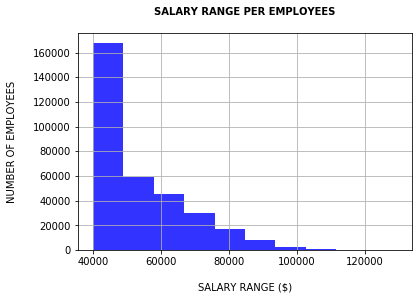

In [16]:
plt.hist(clean_dept_salary_df["Salary"], color='blue', alpha=.8);

plt.xlabel("\nSALARY RANGE ($)");
plt.ylabel("NUMBER OF EMPLOYEES\n");
plt.title("SALARY RANGE PER EMPLOYEES\n", weight="bold", size=10)
plt.grid()


plt.savefig("Hist_By_Dept_Salaries_Range.png")

In [17]:
#Group the salary and title df

title_salaries_group_df = title_salaries.groupby("Title").mean()
title_salaries_group_df

title_salary = title_salaries_group_df.drop(columns = "Employee Number")
title_salary = title_salary.reset_index()
title_salary

,Title,Salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


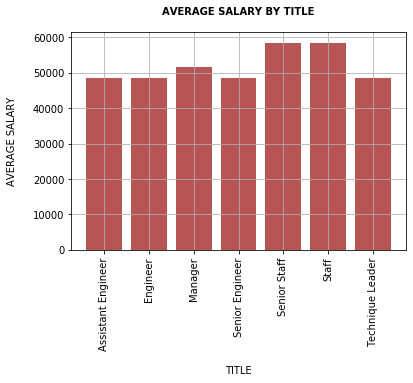

In [18]:
# Create a bar chart of average salary by title.

x_axis = title_salary["Title"]
y_axis = title_salary["Salary"]

plt.bar(x_axis, y_axis, color='Brown', alpha=0.8)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation=90);

plt.xlabel("\nTITLE")
plt.ylabel("AVERAGE SALARY\n")
plt.title("AVERAGE SALARY BY TITLE\n", weight="bold", size=10)
plt.grid()


plt.savefig("Bar_Avg_Salary_By_Title.png")
